In [1]:
import sys
sys.path.append('..')

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from CommonFunctions import *
%matplotlib inline

In [3]:
n = 5000
lags = 50
burn_in = 50
ar_c, ma_c = 8, 14
params = [[1.3, -0.7], [-1.0, 0.8]]

In [4]:
model_ar = AutoRegressiveModel(params[0], ar_c)
model_ma = MovingAverageModel(params[1], ma_c)
model_ar_pred = model_ar(n, burn_in=burn_in)
model_ma_pred, _ = model_ma(n, burn_in=burn_in)

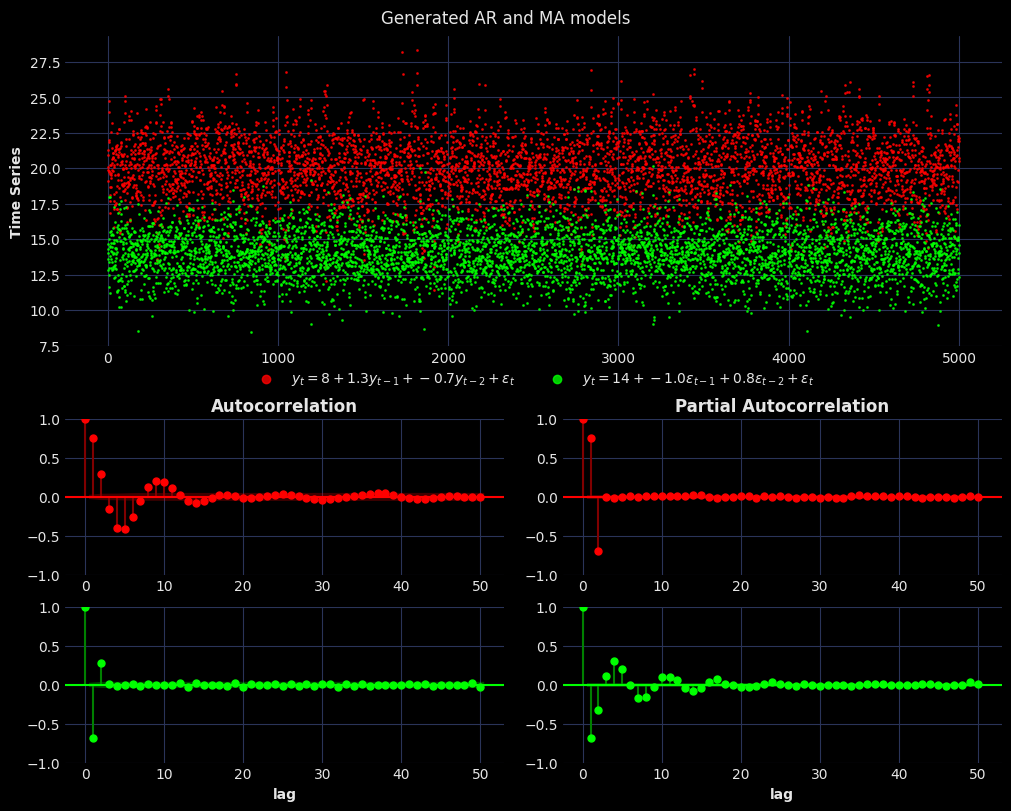

In [5]:
plot_time_series_analysis([model_ar, model_ma], [model_ar_pred, model_ma_pred], params, 
                          lags, (10, 8), 0.8, 'Generated AR and MA models', 'images/ARIMAfig1.png')

Let's fit ARIMA and use it to predict last 500 elements

In [6]:
train, test = 4950, 50
start = train - 25
p_list = [1, 2, 3, 4]

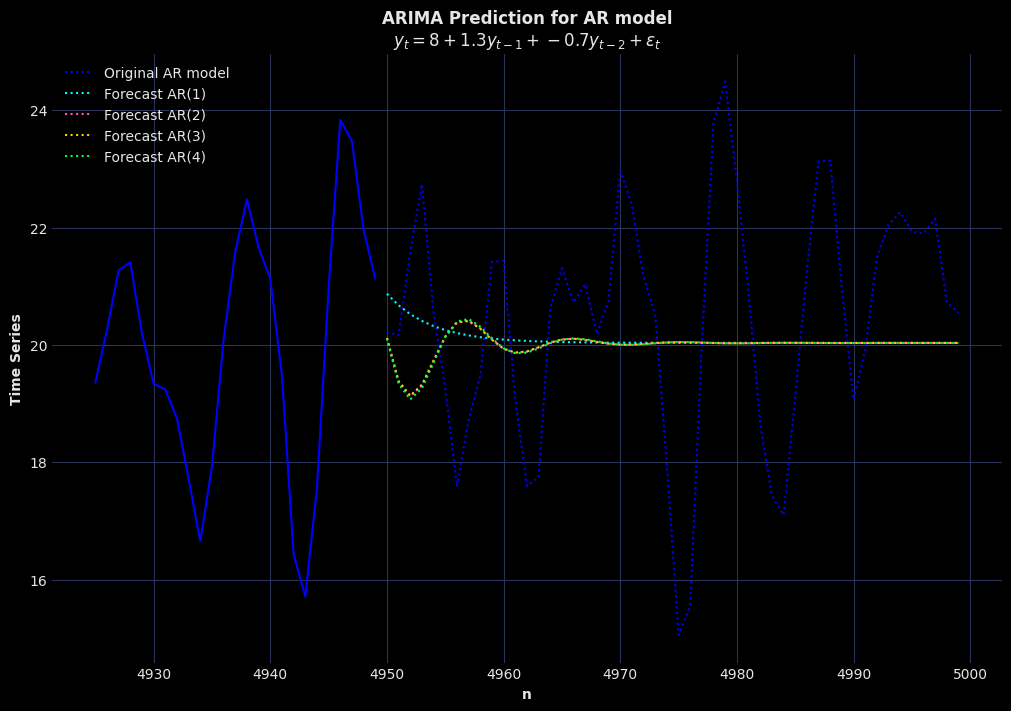

In [7]:
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(10, 7))
    axes.plot(range(start, train), model_ar_pred[start:train], color='blue')
    axes.plot(range(train, n), model_ar_pred[train:n], 
              color='blue', linestyle=':', label='Original AR model')
    for p in p_list:
        ARIMA_model_ar = ARIMA(model_ar_pred[:train], order=(p, 0, 0))
        model_ar_forecast = ARIMA_model_ar.fit().forecast(steps=test)
        axes.plot(range(train, n), model_ar_forecast, 
                  linestyle=':', label=f'Forecast AR({p})')
    axes.legend()
    axes.set(xlabel='n', ylabel='Time Series', title=f'ARIMA Prediction for AR model\n{str(model_ar)}')
    enhance_plot(figure, axes)
figure.savefig('images/ARIMAfig2.png')

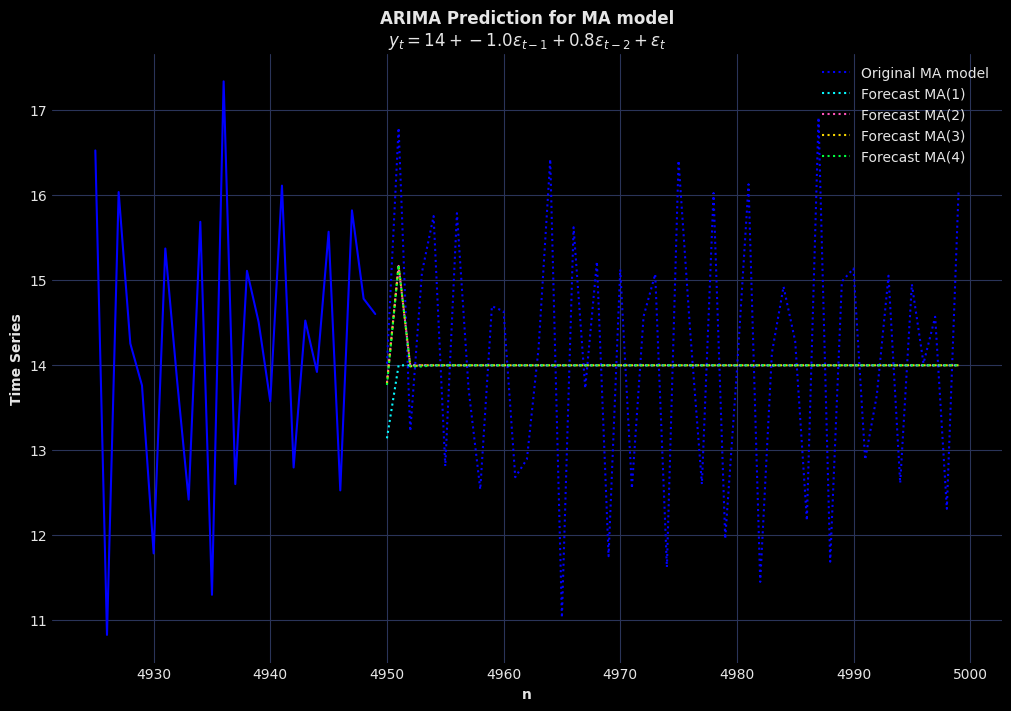

In [8]:
with plt.style.context('cyberpunk'):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(10, 7))
    axes.plot(range(start, train), model_ma_pred[start:train], color='blue')
    axes.plot(range(train, n), model_ma_pred[train:n], 
              color='blue', linestyle=':', label='Original MA model')
    for q in p_list:
        ARIMA_model_ma = ARIMA(model_ma_pred[:train], order=(0, 0, q))
        model_ma_forecast = ARIMA_model_ma.fit().forecast(steps=test)
        axes.plot(range(train, n), model_ma_forecast, 
                  linestyle=':', label=f'Forecast MA({q})')
    axes.legend()
    axes.set(xlabel='n', ylabel='Time Series', title=f'ARIMA Prediction for MA model\n{str(model_ma)}')
    enhance_plot(figure, axes)
figure.savefig('images/ARIMAfig3.png')